In [ ]:
import tensorflow as tf
print(tf.__version__) 

2.8.0


In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split

In [ ]:
ds = pd.read_csv('/content/crx.data',header = None)

In [ ]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
ds.shape

(690, 16)

***Preprocessing***

In [ ]:
ds.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [ ]:
for i in range(0,16):
  print('the column ' + str(i) + ' distinct value are : ' + str(np.unique(ds[i])))

the column 0 distinct value are : ['?' 'a' 'b']
the column 1 distinct value are : ['13.75' '15.17' '15.75' '15.83' '15.92' '16.00' '16.08' '16.17' '16.25'
 '16.33' '16.50' '16.92' '17.08' '17.25' '17.33' '17.42' '17.50' '17.58'
 '17.67' '17.83' '17.92' '18.00' '18.08' '18.17' '18.25' '18.33' '18.42'
 '18.50' '18.58' '18.67' '18.75' '18.83' '18.92' '19.00' '19.17' '19.33'
 '19.42' '19.50' '19.58' '19.67' '19.75' '20.00' '20.08' '20.17' '20.25'
 '20.33' '20.42' '20.50' '20.67' '20.75' '20.83' '21.00' '21.08' '21.17'
 '21.25' '21.33' '21.42' '21.50' '21.58' '21.67' '21.75' '21.83' '21.92'
 '22.00' '22.08' '22.17' '22.25' '22.33' '22.42' '22.50' '22.58' '22.67'
 '22.75' '22.83' '22.92' '23.00' '23.08' '23.17' '23.25' '23.33' '23.42'
 '23.50' '23.58' '23.75' '23.92' '24.08' '24.17' '24.33' '24.42' '24.50'
 '24.58' '24.75' '24.83' '24.92' '25.00' '25.08' '25.17' '25.25' '25.33'
 '25.42' '25.50' '25.58' '25.67' '25.75' '25.83' '25.92' '26.00' '26.08'
 '26.17' '26.25' '26.33' '26.50' '26.58' '

In [ ]:
#mode return value that appear most often
for i in range(0,16):
  mode = ds[ds[i]!="?"][i].mode()[0]
  ds[i] = ds[i].replace("?", mode)

In [ ]:
#change string value to numeric value for each cloumn
lst_s_to_n = [0,3,4,5,6,8,9,11,12,15]
for i in lst_s_to_n:
  ds[i] = ds[i].astype('category').cat.rename_categories(range(0, ds[i].nunique()))

In [ ]:
ds = ds.astype(float)

In [ ]:
#except feature with [0,1] value i scale other features
lst_scale = [1,2,3,4,5,6,7,10,12,13,14]
for i in lst_scale:
  ds[i]=ds[i]/(max(ds[i])-min(ds[i]))

In [ ]:
for i in range(0,16):
  print('the column ' + str(i) + ' distinct value are : ' + str(np.unique(ds[i])))

the column 0 distinct value are : [0. 1.]
the column 1 distinct value are : [0.20676692 0.2281203  0.23684211 0.23804511 0.2393985  0.2406015
 0.24180451 0.24315789 0.2443609  0.24556391 0.2481203  0.25443609
 0.25684211 0.2593985  0.2606015  0.26195489 0.26315789 0.2643609
 0.26571429 0.2681203  0.26947368 0.27067669 0.2718797  0.27323308
 0.27443609 0.2756391  0.27699248 0.27819549 0.2793985  0.28075188
 0.28195489 0.28315789 0.28451128 0.28571429 0.28827068 0.29067669
 0.29203008 0.29323308 0.29443609 0.29578947 0.29699248 0.30075188
 0.30195489 0.30330827 0.30451128 0.30571429 0.30706767 0.30827068
 0.31082707 0.31203008 0.31323308 0.31578947 0.31699248 0.31834586
 0.31954887 0.32075188 0.32210526 0.32330827 0.32451128 0.32586466
 0.32706767 0.32827068 0.32962406 0.33082707 0.33203008 0.33338346
 0.33458647 0.33578947 0.33714286 0.33834586 0.33954887 0.34090226
 0.34210526 0.34330827 0.34466165 0.34586466 0.34706767 0.34842105
 0.34962406 0.35082707 0.35218045 0.35338346 0.35458647

In [ ]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.463609,0.000000,0.5,0.0,0.923077,0.875,0.043860,1.0,1.0,0.014925,0.0,0.0,0.1010,0.00000,0.0
1,0.0,0.882256,0.159286,0.5,0.0,0.769231,0.375,0.106667,1.0,1.0,0.089552,0.0,0.0,0.0215,0.00560,0.0
2,0.0,0.368421,0.017857,0.5,0.0,0.769231,0.375,0.052632,1.0,0.0,0.000000,0.0,0.0,0.1400,0.00824,0.0
3,1.0,0.418496,0.055000,0.5,0.0,0.923077,0.875,0.131579,1.0,1.0,0.074627,1.0,0.0,0.0500,0.00003,0.0
4,1.0,0.303308,0.200893,0.5,0.0,0.923077,0.875,0.060000,1.0,0.0,0.000000,0.0,1.0,0.0600,0.00000,0.0


***Split data into train test val***

In [ ]:
X = ds.iloc[:,0:15]
y = ds[15]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_test , X_val, y_test, y_val =train_test_split(X_test,y_test,test_size=0.33,random_state=22)

In [ ]:
X_train.shape

(483, 15)

In [ ]:
X_test.shape

(138, 15)

In [ ]:
X_val.shape

(69, 15)

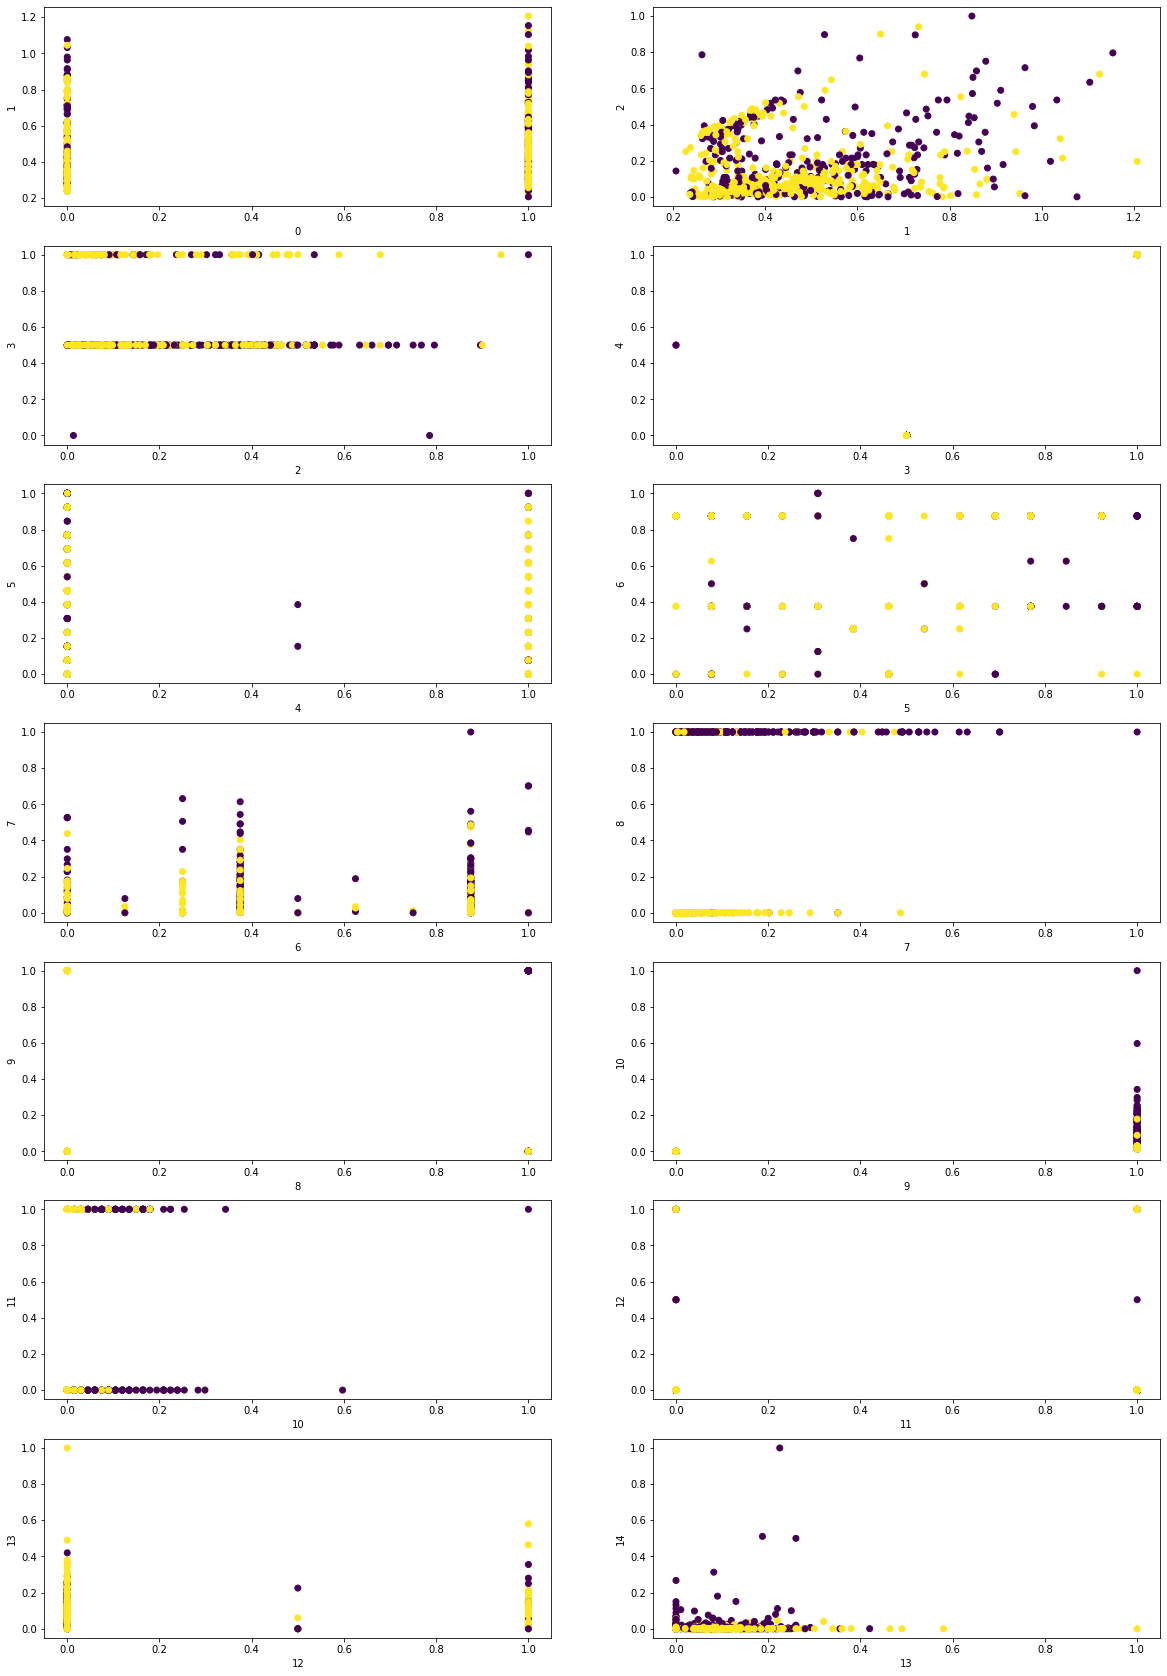

In [68]:
plt.figure(figsize=(20,30))

for i in range(0,14):
  plt.subplot(7,2,i+1)
  plt.xlabel([])
  plt.ylabel([])
  plt.scatter(X[i],X[i+1],c=y)
  plt.xlabel(i)
  plt.ylabel(i+1)

**perceptron neural network**

In [ ]:
#mulilayer pereptron
#array of layersin keras.model.sequential
model = keras.models.Sequential([
                                 keras.layers.Dense(units=132,activation='relu'),
                                 keras.layers.Dense(units =10, activation = 'relu'),
                                 keras.layers.Dense(2, activation = 'softmax')
                                 # with activation = softmax in last layer we have probabilty distribution of our data in each class
                                 #keras.layers.Dense(2)
                                ])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

              # we can use as tring or class and make object from them
              # optimizer = keras.optimizers.Adam(learning_rate= 0.00001),
              # loss = keras.losses.SparseCategoricalCrossentropy(),
              #if we dont apply softmax on last layer we can use from_logits=True in loss
              

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.5757 - accuracy: 0.7516
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8385
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8592
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8613
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8634
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8634
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8551
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8571
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8654
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8592


In [ ]:
test_loss,test_accuracy = model.evaluate(X_test,y_test, verbose=2)

5/5 - 0s - loss: 0.3211 - accuracy: 0.9130 - 121ms/epoch - 24ms/step


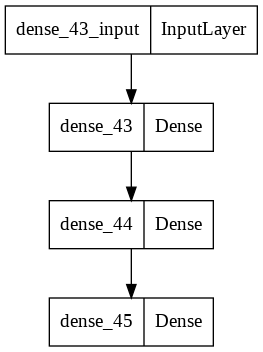

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# to check if we have overfit --> use validation set(update weights with validation set in learning time)